# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from yellowbrick.cluster import KElbowVisualizer #untuk visualisasi metode Elbow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans, DBSCAN #untuk clustering
from sklearn.metrics import silhouette_score #untuk mengevaluasi hasil clustering
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [2]:
df=pd.read_csv('bank_transactions_data_edited.csv')

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
#Mengubah tipe data yang salah
datetime_columns =["TransactionDate", "PreviousTransactionDate"]

for column in datetime_columns:
    df[column] = pd.to_datetime(df[column])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   TransactionDate          2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  TransactionDuration      2511 non-

In [7]:
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2511.000000,2509,2519.000000,2511.000000,2516.000000,2510.000000,2513
mean,297.656468,2023-07-05 17:33:20.831805440,44.678444,119.422939,1.121622,5113.438124,2024-11-04 08:09:22.576999424
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.310000,2023-04-03 16:14:34,27.000000,63.000000,1.000000,1504.727500,2024-11-04 08:07:54
50%,211.360000,2023-07-07 17:40:58,45.000000,112.000000,1.000000,4734.110000,2024-11-04 08:09:23
75%,413.105000,2023-10-06 18:44:37,59.000000,161.000000,1.000000,7672.687500,2024-11-04 08:10:54
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,292.230367,NaN,17.837359,70.078513,0.594469,3897.975861,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

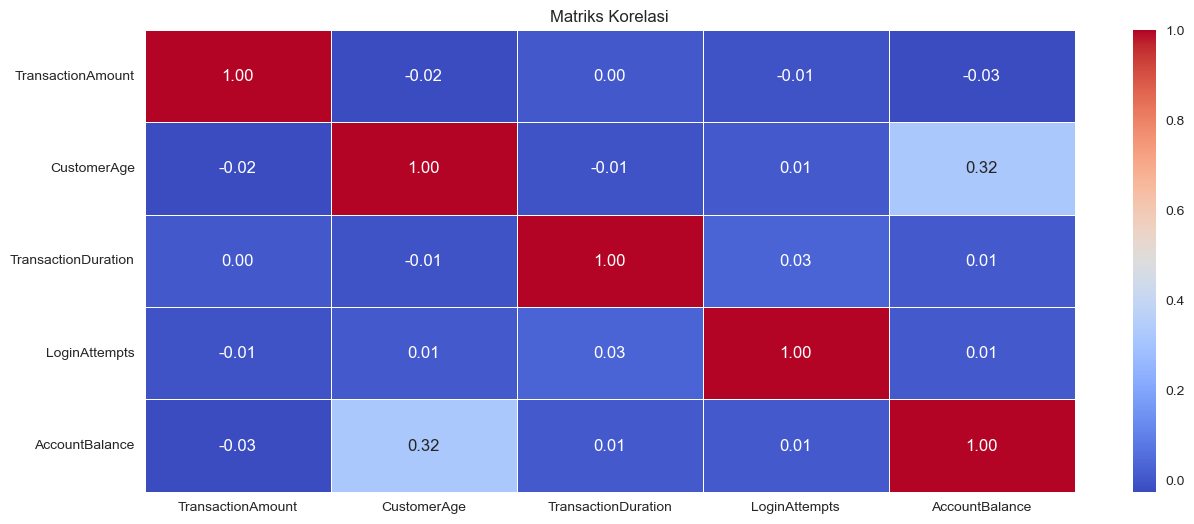

In [8]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
#Matriks korelasi untuk fitur numerik
num_features=df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,6))
corr_matrix= num_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

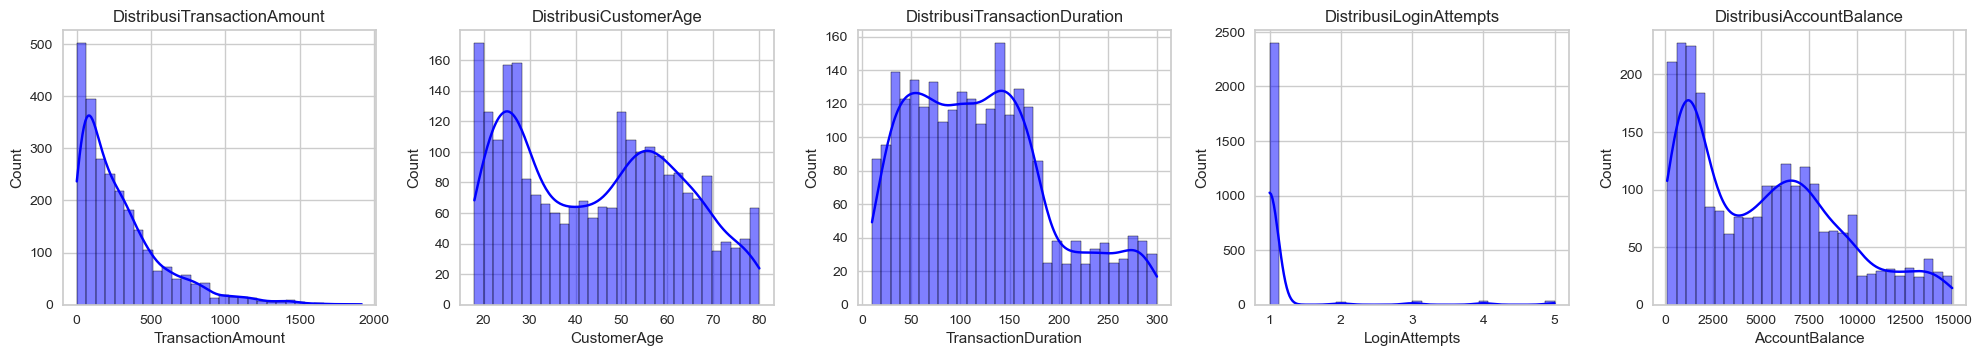

In [9]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
#### Distribusi fitur numerik
num_feat = df.select_dtypes(include =[np.number])
plt.figure(figsize=(20, 20))
for i, column in enumerate(num_feat.columns, 1):
    plt.subplot(6, 5, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi{column}')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [10]:
#Mengambil tahun dari TransactionDate untuk keperluan visualisasi
df["TransactionYear"]=df["TransactionDate"].dt.year
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2023.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2023.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2023.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2023.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,2023.0


In [11]:
df['TransactionYear'].value_counts()

TransactionYear
2023.0    2496
2024.0      13
Name: count, dtype: int64

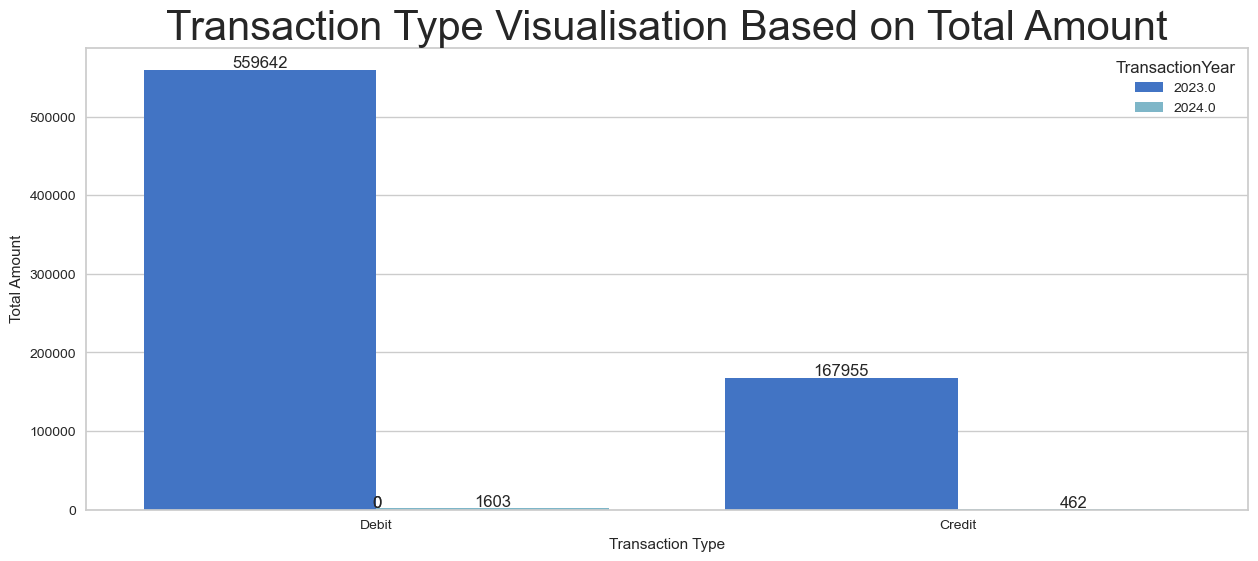

In [12]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
bytransactiontype_df = df.groupby(by =["TransactionType","TransactionYear"]).TransactionAmount.sum().reset_index()
bytransactiontype_df.rename(columns={
    "TransactionType" : "tt_count",
}, inplace =True)

plt.figure(figsize=(15,6))
colors=["#2c6fda", "#72bcd4"]

sns.barplot(
    y= "TransactionAmount",
    x= "tt_count",
    hue = "TransactionYear",
    data = bytransactiontype_df.sort_values(by="TransactionAmount", ascending=False),
    palette = colors
)
plt.title("Transaction Type Visualisation Based on Total Amount", loc="center", fontsize=30)
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")

#Menambah label jumlah pelanggan diatas setiap bar
for p in plt.gca().patches:
        plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [13]:
df.groupby(by="Channel").TransactionID.nunique().sort_values(ascending=False)

Channel
Branch    849
ATM       815
Online    793
Name: TransactionID, dtype: int64

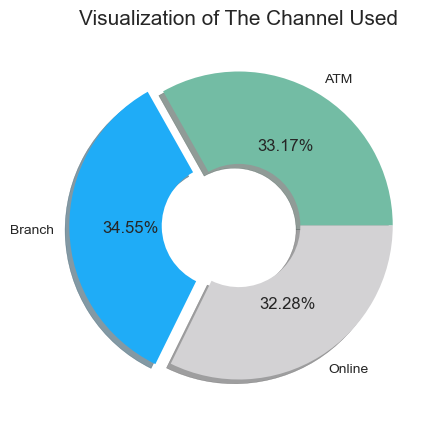

In [14]:
bychannel_df = df.groupby(by ="Channel").TransactionID.nunique().reset_index()
bychannel_df.rename(columns={
    "TransactionID" : "transaction_count"
}, inplace =True)

plt.figure(figsize=(10,5))

colors=["#73bca4", "#1facf7", "#d3d2d4"]
explode = (0, 0.1, 0)

plt.pie(
    x = bychannel_df['transaction_count'],
    labels = bychannel_df['Channel'],
    autopct = '%1.2f%%',
    colors=colors,
    explode = explode,
    shadow=True,
    wedgeprops={'width':0.6}
)
plt.title("Visualization of The Channel Used", loc="center", fontsize=15)
plt.show()

In [15]:
df.groupby(by="CustomerOccupation").AccountID.nunique().sort_values(ascending=False)

CustomerOccupation
Doctor      363
Engineer    356
Student     354
Retired     336
Name: AccountID, dtype: int64

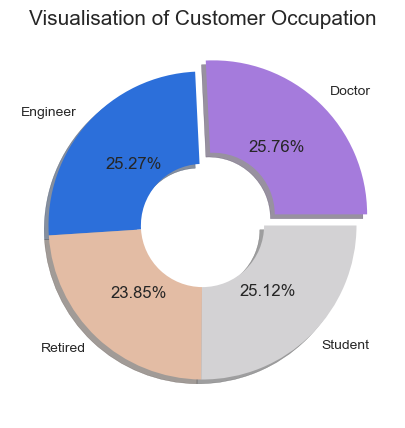

In [16]:
byoccupation_df = df.groupby(by ="CustomerOccupation").AccountID.nunique().reset_index()
byoccupation_df.rename(columns={
    "AccountID" : "acc_count"
}, inplace =True)

plt.figure(figsize=(10,5))

colors=["#a57bdc", "#2c6fda", "#e3bca4", "#d3d2d4"]
explode =(0.1, 0, 0, 0)

plt.pie(
    x = byoccupation_df['acc_count'],
    labels = byoccupation_df['CustomerOccupation'],
    autopct = '%1.2f%%',
    colors=colors,
    explode = explode,
    shadow=True,
    wedgeprops={'width':0.6}
)
plt.title("Visualisation of Customer Occupation", loc="center", fontsize=15)
plt.show()

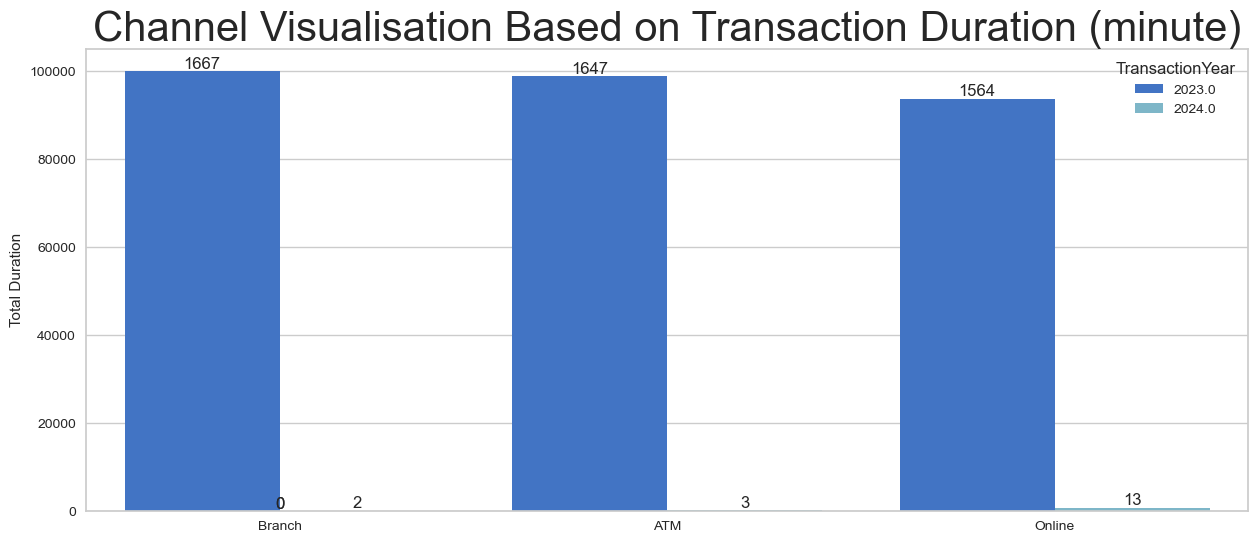

In [17]:
bychanneltype_df = df.groupby(by =["Channel","TransactionYear"]).TransactionDuration.sum().reset_index()
bychanneltype_df.rename(columns={
    "Channel" : "chan_count",
}, inplace =True)

plt.figure(figsize=(15,6))
colors=["#2c6fda", "#72bcd4"]

sns.barplot(
    y= "TransactionDuration",
    x= "chan_count",
    hue = "TransactionYear",
    data = bychanneltype_df.sort_values(by="TransactionDuration", ascending=False),
    palette = colors
)
plt.title("Channel Visualisation Based on Transaction Duration (minute)", loc="center", fontsize=30)
plt.xlabel(None)
plt.ylabel("Total Duration")

#Menambah label jumlah pelanggan diatas setiap bar
for p in plt.gca().patches:
        plt.gca().annotate(int(p.get_height()/60), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [18]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
TransactionYear            28
dtype: int64

In [19]:
#Mecari saldo keseluruhan
df["TotalBalance"]=df["TransactionAmount"]+df["AccountBalance"]
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TotalBalance
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2023.0,5126.30
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2023.0,14135.15
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2023.0,1248.64
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2023.0,8753.56
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,2023.0,7442.85


In [20]:
# Mengecek dataset menggunakan duplicated().sum()
print("Number of duplicate data in the table:", df.duplicated().sum()) 

Number of duplicate data in the table: 21


In [53]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
num_feat = df.select_dtypes(include =[np.number])
scaler =MinMaxScaler()
for column in num_feat:
    model = scaler.fit(df[[column]])
    df[column] = model.transform(df[[column]])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.0,0.316272,Fast,Senior
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.0,0.889670,Standard,Senior
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.0,0.069466,Fast,Youth
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.0,0.547141,Fast,Youth
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.0,0.463717,Long,Senior


In [55]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=['TransactionID','AccountID','IP Address','DeviceID','MerchantID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2511 non-null   float64       
 1   TransactionDate          2509 non-null   datetime64[ns]
 2   TransactionType          2507 non-null   object        
 3   Location                 2507 non-null   object        
 4   Channel                  2510 non-null   object        
 5   CustomerAge              2519 non-null   float64       
 6   CustomerOccupation       2514 non-null   object        
 7   TransactionDuration      2511 non-null   float64       
 8   LoginAttempts            2516 non-null   float64       
 9   AccountBalance           2510 non-null   float64       
 10  PreviousTransactionDate  2513 non-null   datetime64[ns]
 11  TransactionYear          2509 non-null   float64       
 12  TotalBalance             2485 non-

In [57]:
#Melihat isi column kategorikal untuk menentukan jenis encodingnya
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts(dropna=False))
    print("-" * 30)

TransactionType
Debit     1942
Credit     565
NaN         30
Name: count, dtype: int64
------------------------------
Location
Fort Worth          71
Los Angeles         69
Oklahoma City       69
Charlotte           68
Tucson              68
Philadelphia        67
Houston             65
Miami               65
Memphis             64
Omaha               63
Detroit             63
Denver              62
Seattle             61
Boston              61
Chicago             60
New York            60
Colorado Springs    60
Atlanta             60
Raleigh             60
Mesa                60
Jacksonville        59
Fresno              59
San Jose            59
San Antonio         59
Austin              59
Phoenix             58
Indianapolis        58
Kansas City         58
San Diego           57
San Francisco       57
Virginia Beach      56
Las Vegas           55
Sacramento          54
Milwaukee           54
Columbus            54
Nashville           54
Baltimore           50
Louisville          50

In [59]:
#Mengisi missing value untuk fitur kategori sebelum melakukan encoding

categ_col= ['TransactionType','Location', 'Channel','CustomerOccupation']

for col in categ_col:
    df[col]=df[col].fillna(value="Unknown")

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.0,0.316272,Fast,Senior
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.0,0.889670,Standard,Senior
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.0,0.069466,Fast,Youth
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.0,0.547141,Fast,Youth
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.0,0.463717,Long,Senior


In [61]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

categ_columns= ['TransactionType','Location', 'Channel','CustomerOccupation']

#Buat instance LabelEncoder
le = LabelEncoder()

for column in categ_columns:
    df[column] = le.fit_transform(df[column])

#Tampilkan dataframe untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.0,0.316272,Fast,Senior
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.0,0.889670,Standard,Senior
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.0,0.069466,Fast,Youth
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.0,0.547141,Fast,Youth
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.0,0.463717,Long,Senior


In [62]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate',
 'TransactionYear',
 'TotalBalance',
 'TranDurationGroup',
 'CusAgeGroup']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [65]:
#Melihat kolom yang masih ada missing value
df.isna().sum()

TransactionAmount          26
TransactionDate            28
TransactionType             0
Location                    0
Channel                     0
CustomerAge                18
CustomerOccupation          0
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
TransactionYear            28
TotalBalance               52
TranDurationGroup           0
CusAgeGroup                 0
dtype: int64

In [67]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
mode_column = ['CustomerAge','LoginAttempts','TransactionDate','PreviousTransactionDate','TransactionYear'] #mengisi missing value dengan nilai modus pada kolom tertentu

for col in mode_column:
    df[col] =df[col].fillna(df[col].mode()[0])

In [69]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
mean_column = ['TransactionAmount','AccountBalance','TransactionDuration'] #mengisi missing value dengan nilai mean pada kolom tertentu

for col in mean_column:
    df[col] =df[col].fillna(df[col].mean())

In [71]:
df['TotalBalance'] = df['TransactionAmount'] + df['AccountBalance']

In [72]:
# Menghapus data duplikat menggunakan drop_duplicates().
df =df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

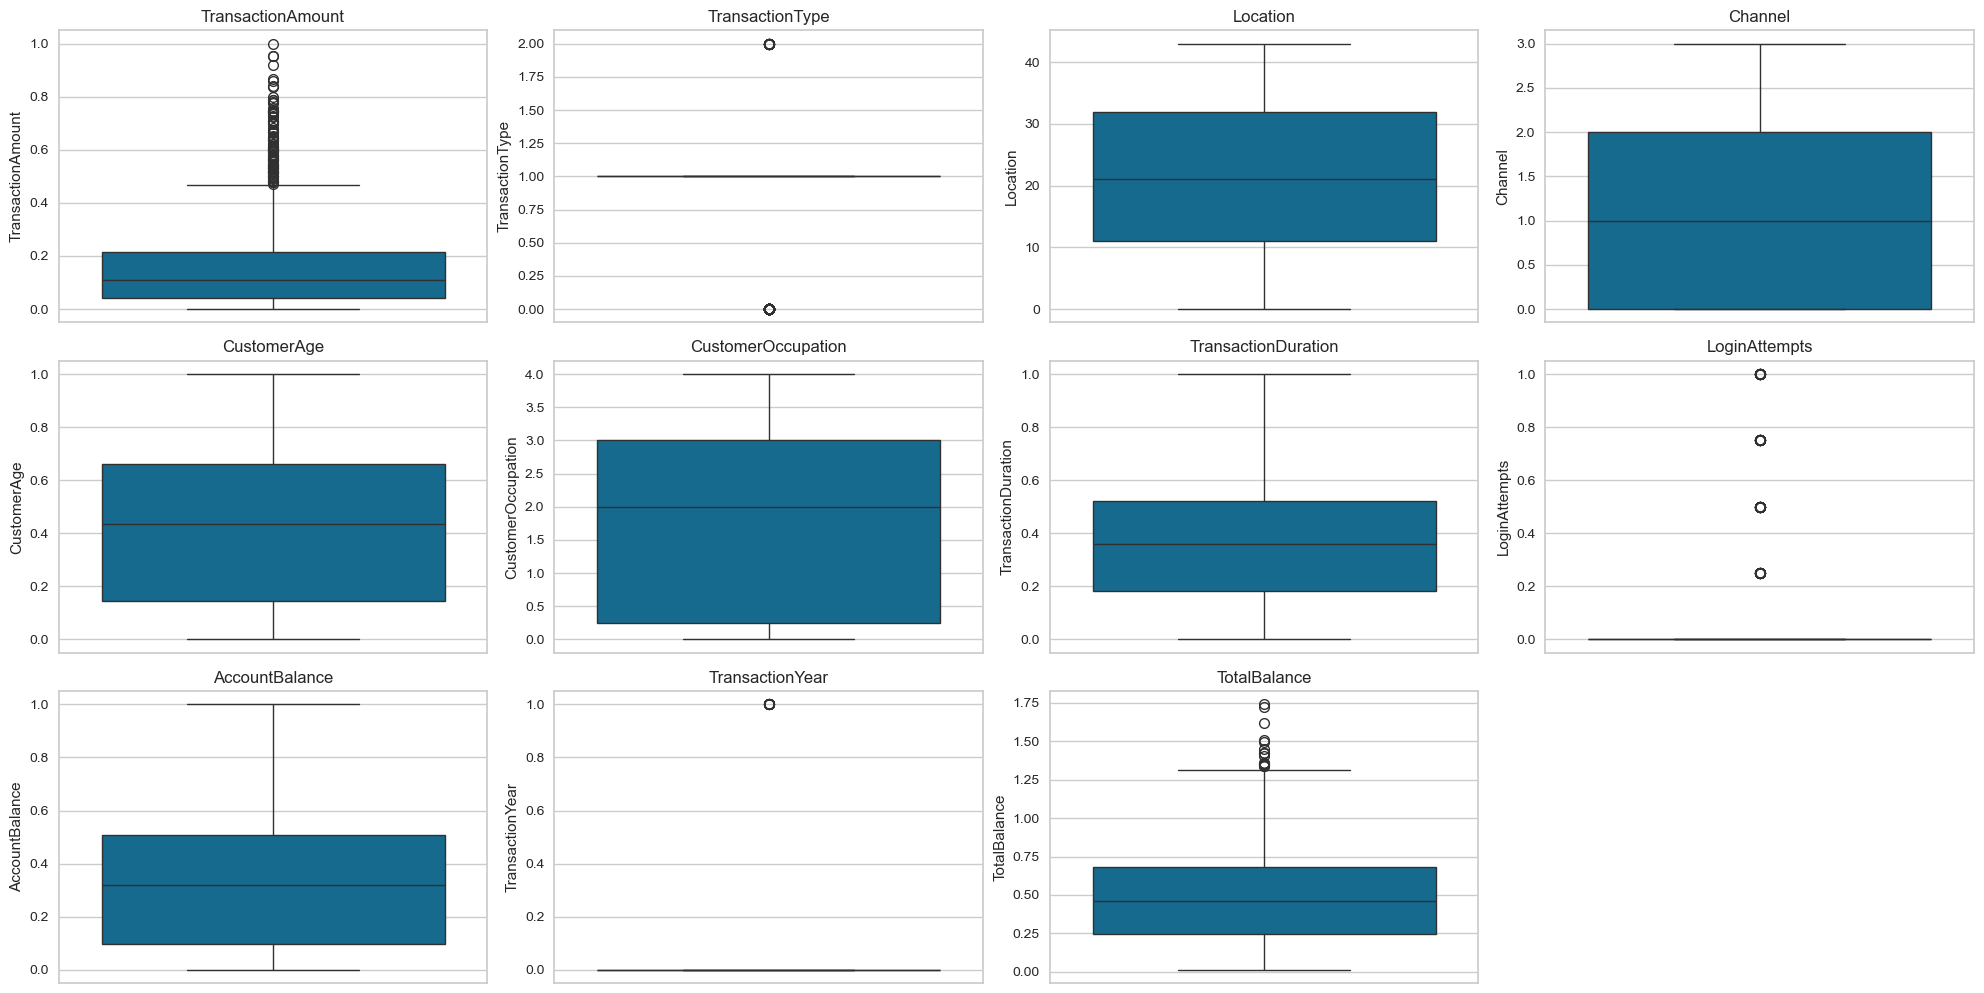

In [75]:
#Melihat Outlier pada data
#boxplot seluruh data numerik untuk melihat outlier
num_feat = df.select_dtypes(include='number').columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_feat):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [76]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
num_feat =['TransactionAmount','TransactionType','LoginAttempts','TransactionYear','TotalBalance']

for  col in num_feat:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5 *IQR
    upper_bound = Q3+1.5 *IQR
    
    #Fungsi custom untuk mengganti outlier dengan batas atas, batas bawah
    df[col] = np.clip(df[col], lower_bound, upper_bound)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.0,0.344039,Fast,Senior
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.0,1.113995,Standard,Senior
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.0,0.134317,Fast,Youth
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.0,0.665214,Fast,Youth
4,0.006874,2023-10-16 17:51:24,1,1,2,0.145161,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.0,0.499465,Long,Senior


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

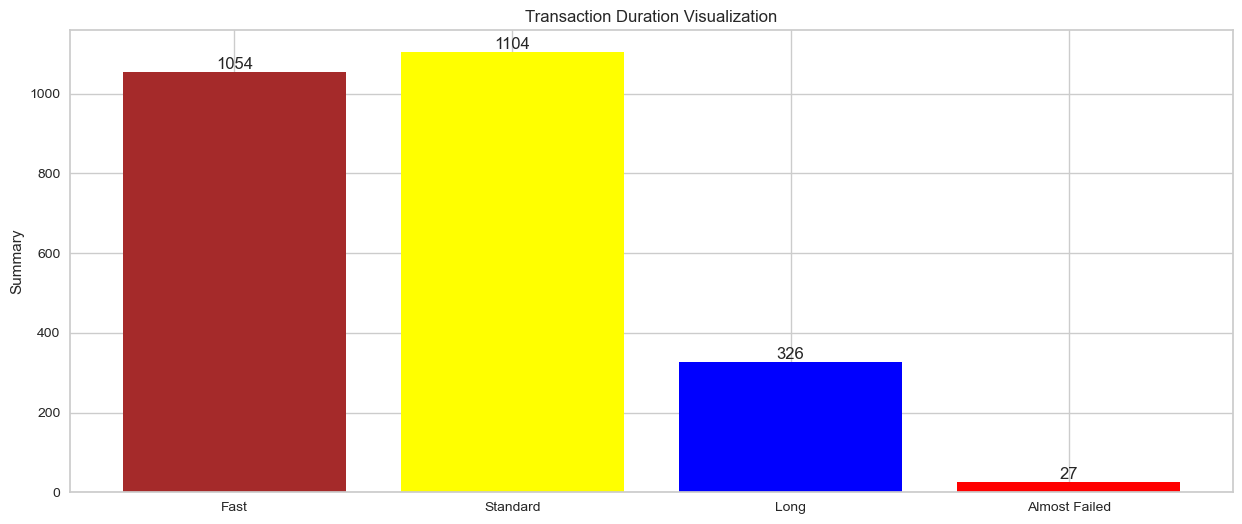

In [21]:
#Binning Transaction Duration
fast =df.TransactionDuration[df.TransactionDuration <= 96]
standard =df.TransactionDuration[(df.TransactionDuration >= 97) & (df.TransactionDuration <= 194)]
long =df.TransactionDuration[(df.TransactionDuration >= 195) & (df.TransactionDuration <= 291)]
almostfailed =df.TransactionDuration[df.TransactionDuration >= 292]

#Menyusun data untuk plotting
x = ["Fast", "Standard", "Long", "Almost Failed"]
y = [len(fast.values), len(standard.values), len(long.values), len(almostfailed.values)]

#Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15,6))
plt.bar(x, y, color=['brown', 'yellow', 'blue','red'])
plt.title("Transaction Duration Visualization")
plt.xlabel(None)
plt.ylabel("Summary")

#Menambah label jumlah pelanggan diatas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

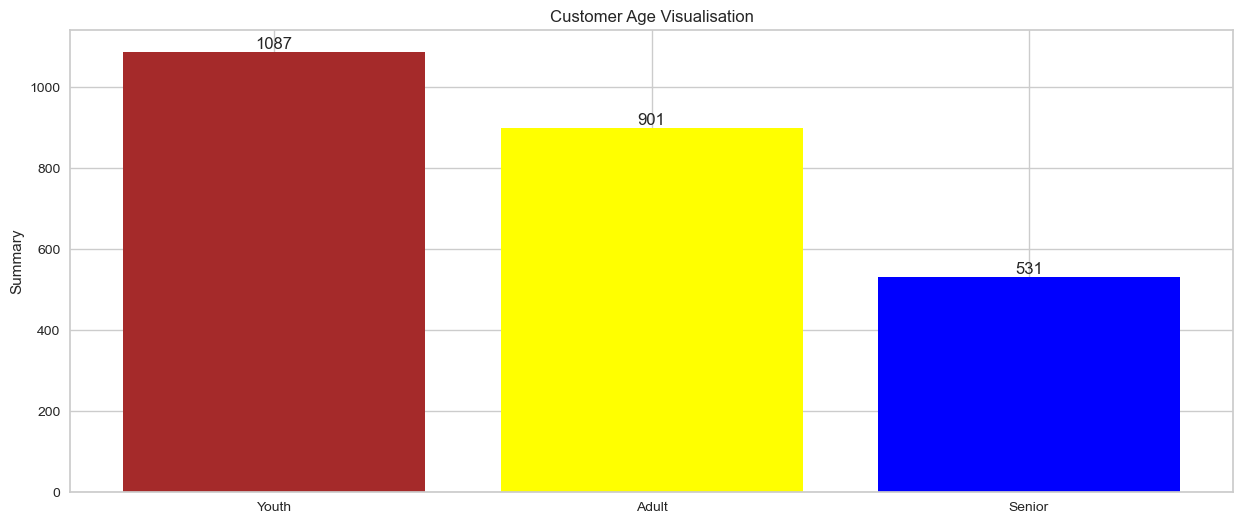

In [22]:
#Binning Customer_age
youth =df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 39)]
adult =df.CustomerAge[(df.CustomerAge >= 40) & (df.CustomerAge <= 61)]
senior =df.CustomerAge[df.CustomerAge >= 62]

#Menyusun data untuk plotting
x = ["Youth", "Adult", "Senior"]
y = [len(youth.values), len(adult.values), len(senior.values)]

#Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15,6))
plt.bar(x, y, color=['brown', 'yellow', 'blue'])
plt.title("Customer Age Visualisation")
plt.xlabel(None)
plt.ylabel("Summary")

#Menambah label jumlah pelanggan diatas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [23]:
#Membuat fitur kategori baru setelah melakukan binning
df['TranDurationGroup'] = df['TransactionDuration'].apply(lambda x:"Fast" if x <= 96 else("Standard" if x <= 194 else ("Long" if x <= 291 else "Almost Failed")))
df['CusAgeGroup'] = df['CustomerAge'].apply(lambda x: "Youth" if x <= 39 else("Adult" if x <= 61 else "Senior"))

In [24]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2023.0,5126.30,Fast,Senior
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2023.0,14135.15,Standard,Senior
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2023.0,1248.64,Fast,Youth
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2023.0,8753.56,Fast,Youth
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,2023.0,7442.85,Long,Senior


In [25]:
df['CusAgeGroup'].value_counts()

CusAgeGroup
Youth     1087
Adult      901
Senior     549
Name: count, dtype: int64

In [26]:
df['TranDurationGroup'].value_counts()

TranDurationGroup
Standard         1104
Fast             1054
Long              326
Almost Failed      53
Name: count, dtype: int64

In [77]:
#Melakukan Label encoding untuk fitur TranDurationGroup yang telah di binning

#Buat instance LabelEncoder
encoder = OrdinalEncoder(categories=[['Almost Failed','Long','Standard','Fast']])

df['TranDurationGroup'] = encoder.fit_transform(df[['TranDurationGroup']])

#Tampilkan dataframe untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.0,0.344039,3.0,Senior
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.0,1.113995,2.0,Senior
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.0,0.134317,3.0,Youth
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.0,0.665214,3.0,Youth
4,0.006874,2023-10-16 17:51:24,1,1,2,0.145161,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.0,0.499465,1.0,Senior


In [78]:
#Melakukan Label encoding untuk fitur CusAgeGroup yang telah di binning

#Buat instance LabelEncoder
encoder = OrdinalEncoder(categories=[['Youth','Adult','Senior']])

df['CusAgeGroup'] = encoder.fit_transform(df[['CusAgeGroup']])

#Tampilkan dataframe untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.0,0.344039,3.0,2.0
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.0,1.113995,2.0,2.0
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.0,0.134317,3.0,0.0
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.0,0.665214,3.0,0.0
4,0.006874,2023-10-16 17:51:24,1,1,2,0.145161,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.0,0.499465,1.0,2.0


In [83]:
#Mengahpus kolom TransactionDate dan PreviousTransactionDate
df.drop(columns=['TransactionDate','PreviousTransactionDate'], inplace=True)
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.0,0.344039,3.0,2.0
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.0,1.113995,2.0,2.0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,0.0,0.134317,3.0,0.0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.0,0.665214,3.0,0.0
4,0.006874,1,1,2,0.145161,3,0.648276,0.0,0.492591,0.0,0.499465,1.0,2.0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [85]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup
count,2514.000000,2514.0,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.0,2514.000000,2514.0,2514.000000,2514.000000,2514.000000
mean,0.148120,1.0,21.299920,1.01074,0.427336,1.530231,0.377755,0.0,0.337138,0.0,0.491440,2.243437,0.785203
std,0.130014,0.0,12.423933,0.83084,0.287158,1.150477,0.240141,0.0,0.260669,0.0,0.295494,0.752504,0.773622
min,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.014307,0.000000,0.000000
25%,0.043213,1.0,11.000000,0.00000,0.145161,0.250000,0.182759,0.0,0.095324,0.0,0.244466,2.000000,0.000000
50%,0.111121,1.0,21.000000,1.00000,0.435484,2.000000,0.358621,0.0,0.318407,0.0,0.458250,2.000000,1.000000
75%,0.213328,1.0,32.000000,2.00000,0.661290,3.000000,0.520690,0.0,0.506870,0.0,0.679993,3.000000,1.000000
max,0.468501,1.0,43.000000,3.00000,1.000000,4.000000,1.000000,0.0,1.000000,0.0,1.333283,3.000000,2.000000


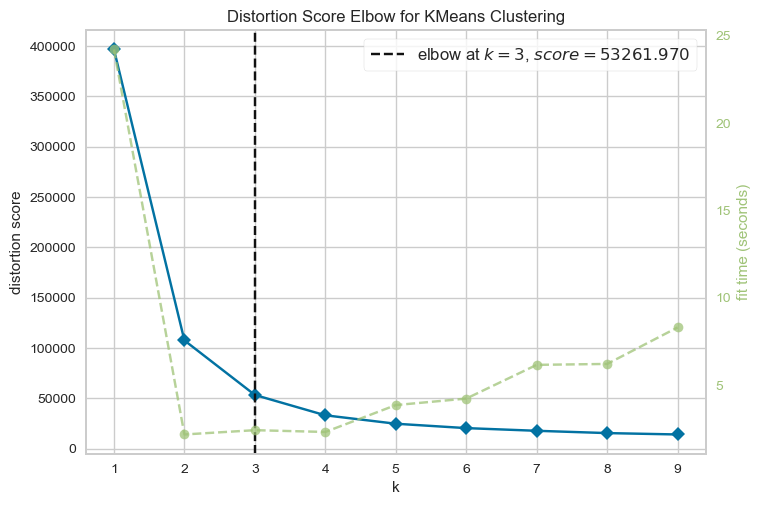

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

#Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

#Insialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

#fit visualizer dengan data untuk menetukan jumlah cluster optimal
visualizer.fit(df)

#Menampilkangrafik elbow untuk analisis
visualizer.show()

In [89]:
# Menggunakan algoritma K-Means Clustering
#Inisialisasi dan melatih model KMeans dengan jumlah cluster =3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

#Mendapatkan label cluster
labels = kmeans.labels_

#Mendapatkan jumlah cluster
k = 3

#Fungsi untuk analisis karakteristik cluster
def analyze_cluster(df, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        #Mengambil data untuk cluster saat ini
        cluster_data = df[labels == cluster_id]      
        
        #Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_transamount = cluster_data["TransactionAmount"].mean() #Rata-rata umur
        mean_transtype = cluster_data["TransactionType"].mean()
        mean_location = cluster_data["Location"].mean() 
        mean_channel = cluster_data["Channel"].mean()
        mean_cusage = cluster_data["CustomerAge"].mean()
        mean_cusoccupation = cluster_data["CustomerOccupation"].mean()
        mean_tranduration = cluster_data["TransactionDuration"].mean() 
        mean_logattempt = cluster_data["LoginAttempts"].mean()
        mean_accbalance = cluster_data["AccountBalance"].mean()
        mean_tranyear = cluster_data["TransactionYear"].mean() 
        mean_totbalance = cluster_data["TotalBalance"].mean() 
        mean_trandurgroup = cluster_data["TranDurationGroup"].mean()
        mean_cusagegroup = cluster_data["CusAgeGroup"].mean()
                        
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Transaction Amount : {mean_transamount:.2f} ")
        print(f"Average Transaction Type: {mean_transtype:.2f} ")
        print(f"Average Location: {mean_location:.2f} ")
        print(f"Average Channel: {mean_channel:.2f} ")
        print(f"Average Customer Age: {mean_cusage:.2f} ")
        print(f"Average Customer Occupation: {mean_cusoccupation:.2f} ")
        print(f"Average Transaction Duration: {mean_tranduration:.2f} ")
        print(f"Average Login Attempts: {mean_logattempt:.2f} ")
        print(f"Average Account Balance: {mean_accbalance:.2f} ")
        print(f"Average Transaction Year: {mean_tranyear:.2f} ")
        print(f"Average Total Balance: {mean_totbalance:.2f} ")
        print(f"Average Transaction Duration Group: {mean_trandurgroup:.2f} ")
        print(f"Average Customer Age Group: {mean_cusagegroup:.2f} ")
                
#Analyze karakteristik setiap cluster
analyze_cluster(df, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Average Transaction Amount : 0.15 
Average Transaction Type: 1.00 
Average Location: 21.51 
Average Channel: 1.02 
Average Customer Age: 0.44 
Average Customer Occupation: 1.53 
Average Transaction Duration: 0.38 
Average Login Attempts: 0.00 
Average Account Balance: 0.33 
Average Transaction Year: 0.00 
Average Total Balance: 0.49 
Average Transaction Duration Group: 2.24 
Average Customer Age Group: 0.82 

Cluster 2:
Average Transaction Amount : 0.15 
Average Transaction Type: 1.00 
Average Location: 7.16 
Average Channel: 1.00 
Average Customer Age: 0.43 
Average Customer Occupation: 1.54 
Average Transaction Duration: 0.38 
Average Login Attempts: 0.00 
Average Account Balance: 0.34 
Average Transaction Year: 0.00 
Average Total Balance: 0.49 
Average Transaction Duration Group: 2.23 
Average Customer Age Group: 0.80 

Cluster 3:
Average Transaction Amount : 0.15 
Average Transaction Type: 1.00 
Average Location: 35.75 
Average Ch

In [91]:
#Memasukkan clustering menjadi kolom target
df['Target'] = labels+1
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TotalBalance,TranDurationGroup,CusAgeGroup,Target
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.0,0.344039,3.0,2.0,3
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.0,1.113995,2.0,2.0,1
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,0.0,0.134317,3.0,0.0,1
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.0,0.665214,3.0,0.0,3
4,0.006874,1,1,2,0.145161,3,0.648276,0.0,0.492591,0.0,0.499465,1.0,2.0,2


Jalankan cell code ini untuk menyimpan model kamu.

In [93]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [93]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_score(df, labels, metric='euclidean')

0.5312888598247376

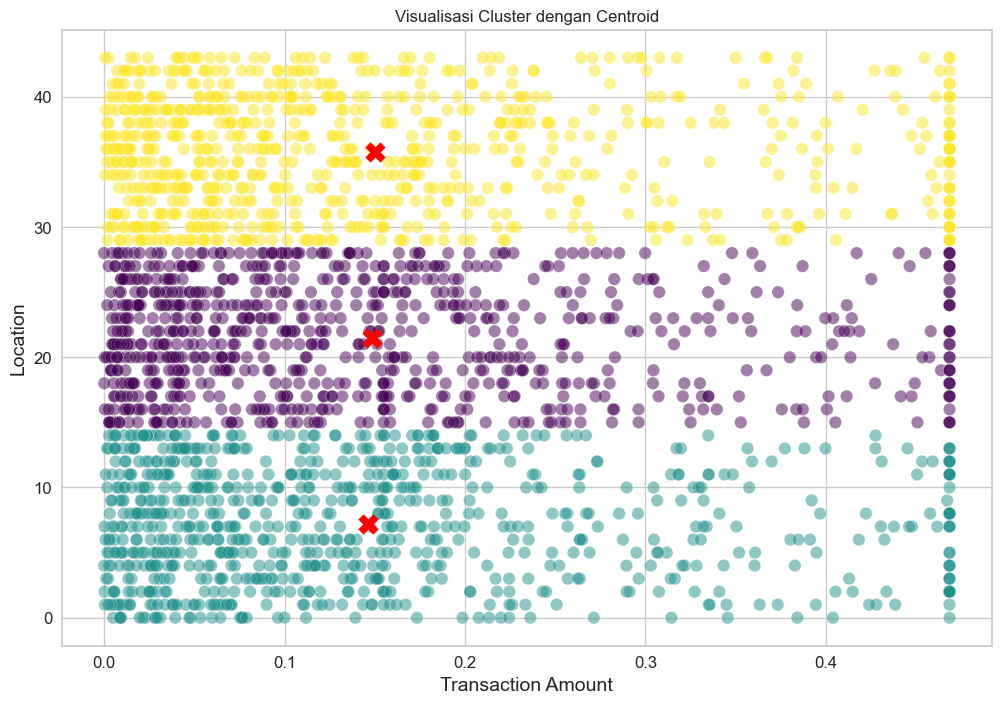

Nilai centroid:
Centroid 1: Transaction Amount= 0.15, Location= 21.51
Centroid 2: Transaction Amount= 0.15, Location= 7.16
Centroid 3: Transaction Amount= 0.15, Location= 35.75


In [95]:
# Membuat visualisasi hasil clustering
#Menentukan posisi centroid
centroids = kmeans.cluster_centers_

#Visualisasi cluster
plt.figure(figsize=(12, 8))

#Plot data
plt.scatter(df.iloc[:, 0], df.iloc[:, 2], c=df['Target'].astype('category'), cmap='viridis', s=80, alpha=0.5, edgecolors='w', marker='o')

#Plot centroid
plt.scatter(centroids[:,0], centroids[:,2],c='red', s=200, marker='X', label ='Centroids')

#Menambah label centroid pada plot
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#Menampilkan nilai centroid
print("Nilai centroid:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Transaction Amount= {centroid[0]:.2f}, Location= {centroid[2]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [97]:
# Membangun model menggunakan PCA.
pca = PCA(n_components = df.shape[1])
pca.fit(df)

#Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns = ['PC%s' % _ for _ in range(len(df.columns))],
                            index=df.columns)
print(loadings)

                              PC0           PC1           PC2           PC3  \
TransactionAmount    8.180410e-05  5.760767e-04 -1.172011e-03 -3.258041e-03   
TransactionType     -1.110223e-16  1.693090e-15 -1.047773e-15 -2.470246e-15   
Location             9.995339e-01 -3.923181e-04 -6.578441e-04  2.808059e-04   
Channel              5.584939e-04  4.785567e-03  9.909008e-01 -5.469840e-02   
CustomerAge         -6.503167e-04 -1.274746e-01 -2.761567e-02  7.094027e-02   
CustomerOccupation  -6.808242e-04  9.218820e-01 -3.922135e-02  6.287897e-02   
TransactionDuration -3.310827e-04 -2.164837e-03 -2.243513e-02 -2.692772e-01   
LoginAttempts        0.000000e+00  0.000000e+00  5.551115e-17 -1.110223e-16   
AccountBalance      -1.752966e-04 -1.479310e-01  7.140623e-03 -4.624623e-03   
TransactionYear      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
TotalBalance        -1.611942e-05 -1.463958e-01  5.232017e-03 -8.098344e-03   
TranDurationGroup    1.630622e-03  1.324352e-02  7.7

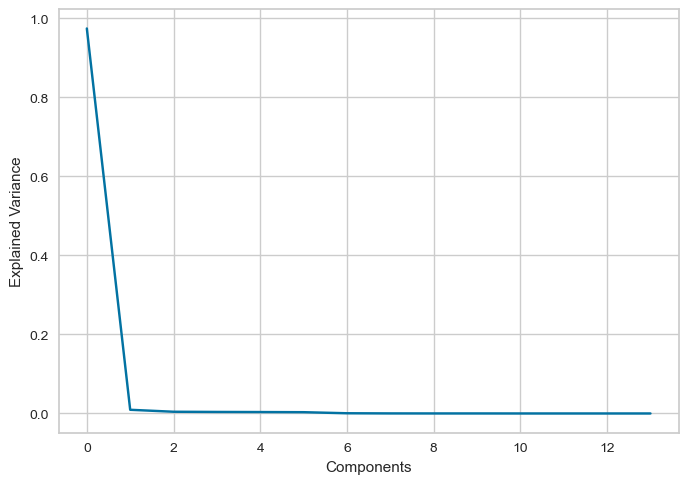

In [99]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [100]:
loadings.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
count,1.400000e+01,14.000000,14.000000,1.400000e+01,14.000000,1.400000e+01,1.400000e+01,1.400000e+01,14.000000,1.400000e+01,14.000000,1.400000e+01,1.400000e+01,1.400000e+01
mean,7.341940e-02,0.015747,0.063157,6.397401e-02,0.076676,9.675890e-02,1.200002e-01,2.249443e-02,0.090417,4.564493e-02,0.044681,7.148999e-02,6.827045e-02,7.439388e-02
std,2.666796e-01,0.276868,0.269495,2.692872e-01,0.265691,2.585355e-01,2.478212e-01,2.763660e-01,0.260996,2.732752e-01,0.273447,2.672436e-01,2.681486e-01,2.663886e-01
min,-2.445025e-03,-0.300568,-0.095457,-2.692772e-01,-0.262157,-2.857752e-02,-3.180714e-02,-6.098337e-01,-0.018004,-3.173139e-01,-0.550416,-3.540057e-12,-4.312993e-02,-6.846993e-04
25%,-2.921362e-04,-0.096147,-0.019349,-7.229914e-03,-0.017363,-2.876772e-04,-6.016502e-03,-5.637048e-03,-0.000161,-3.630685e-03,-0.000014,-9.419548e-16,-2.646965e-16,-2.767426e-17
50%,-5.551115e-17,0.000000,-0.000329,-1.290634e-15,-0.000000,5.204170e-16,1.665465e-14,2.305101e-14,0.000079,-5.062099e-04,0.000019,1.863093e-14,-7.152727e-17,5.446761e-17
75%,4.393215e-04,0.003733,0.003924,4.722943e-02,0.102884,6.850790e-02,1.510225e-01,7.388104e-03,0.011612,3.299878e-14,0.000336,3.845555e-12,1.357942e-17,5.044883e-16
max,9.995339e-01,0.921882,0.990901,9.324193e-01,0.835800,9.635584e-01,7.835456e-01,7.503272e-01,0.960091,9.478876e-01,0.627971,9.999998e-01,9.990695e-01,9.990692e-01


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

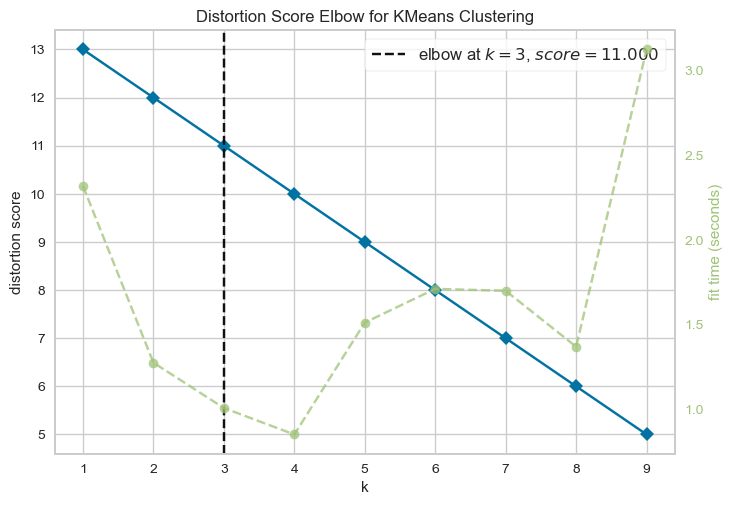

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
#nume_features =loadings.select_dtypes(include=[np.number]).columns

#Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

#Insialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

#fit visualizer dengan data untuk menetukan jumlah cluster optimal
visualizer.fit(loadings)

#Menampilkangrafik elbow untuk analisis
visualizer.show()

In [105]:
# Menggunakan algoritma K-Means Clustering
#Inisialisasi dan melatih model KMeans dengan jumlah cluster =3
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(loadings)

#Mendapatkan label cluster
labels = kmeans_pca.labels_

#Mendapatkan jumlah cluster
k = 3

#Fungsi untuk analisis karakteristik cluster
def analyze_cluster(loadings, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        #Mengambil data untuk cluster saat ini
        cluster_data = loadings[labels == cluster_id]      
        
        #Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_transamount = cluster_data["PC0"].mean() #Rata-rata umur
        mean_transtype = cluster_data["PC1"].mean()
        mean_location = cluster_data["PC2"].mean() 
        mean_channel = cluster_data["PC3"].mean()
        mean_cusage = cluster_data["PC4"].mean()
        mean_cusoccupation = cluster_data["PC5"].mean()
        mean_tranduration = cluster_data["PC6"].mean() 
        mean_logattempt = cluster_data["PC7"].mean()
        mean_accbalance = cluster_data["PC8"].mean()
        mean_tranyear = cluster_data["PC9"].mean() 
        mean_totbalance = cluster_data["PC10"].mean() 
        mean_trandurgroup = cluster_data["PC11"].mean()
        mean_cusagegroup = cluster_data["PC12"].mean()
                        
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Transaction Amount : {mean_transamount:.2f} ")
        print(f"Average Transaction Type: {mean_transtype:.2f} ")
        print(f"Average Location: {mean_location:.2f} ")
        print(f"Average Channel: {mean_channel:.2f} ")
        print(f"Average Customer Age: {mean_cusage:.2f} ")
        print(f"Average Customer Occupation: {mean_cusoccupation:.2f} ")
        print(f"Average Transaction Duration: {mean_tranduration:.2f} ")
        print(f"Average Login Attempts: {mean_logattempt:.2f} ")
        print(f"Average Account Balance: {mean_accbalance:.2f} ")
        print(f"Average Transaction Year: {mean_tranyear:.2f} ")
        print(f"Average Total Balance: {mean_totbalance:.2f} ")
        print(f"Average Transaction Duration Group: {mean_trandurgroup:.2f} ")
        print(f"Average Customer Age Group: {mean_cusagegroup:.2f} ")
                
#Analyze karakteristik setiap cluster
analyze_cluster(loadings, labels, k)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Average Transaction Amount : 0.20 
Average Transaction Type: -0.03 
Average Location: 0.00 
Average Channel: -0.00 
Average Customer Age: -0.00 
Average Customer Occupation: -0.01 
Average Transaction Duration: 0.11 
Average Login Attempts: -0.12 
Average Account Balance: -0.00 
Average Transaction Year: 0.00 
Average Total Balance: 0.11 
Average Transaction Duration Group: 0.20 
Average Customer Age Group: 0.19 

Cluster 2:
Average Transaction Amount : 0.01 
Average Transaction Type: -0.04 
Average Location: 0.16 
Average Channel: -0.05 
Average Customer Age: 0.03 
Average Customer Occupation: 0.18 
Average Transaction Duration: 0.16 
Average Login Attempts: 0.16 
Average Account Balance: 0.17 
Average Transaction Year: 0.16 
Average Total Balance: 0.01 
Average Transaction Duration Group: 0.00 
Average Customer Age Group: -0.00 

Cluster 3:
Average Transaction Amount : -0.00 
Average Transaction Type: 0.21 
Average Location: -0.02 
A

In [107]:
# Menghitung dan menampilkan nilai Silhouette Score PCA.
silhouette_score(loadings, labels, metric='euclidean')

1.1214946133455554e-17

In [111]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
import joblib
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [109]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
transamount = df.groupby('Target')['TransactionAmount'].agg(['min', 'max', 'mean','count', 'sum'])
cusage = df.groupby('Target')['CustomerAge'].agg(['min', 'max', 'mean', 'count', 'sum'])
print("Transction Amount")
print(transamount)
print("Customer Age")
print(cusage)

Transction Amount
             min       max      mean  count         sum
Target                                                 
1       0.000000  0.468501  0.148229    833  123.475101
2       0.000031  0.468501  0.146171    856  125.122241
3       0.000599  0.468501  0.150033    825  123.777174
Customer Age
        min  max      mean  count         sum
Target                                       
1       0.0  1.0  0.437575    833  364.500000
2       0.0  1.0  0.429549    856  367.693548
3       0.0  1.0  0.414702    825  342.129032


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Umur Nasabah dan Jumlah Transaksi)**:
  - **Rata-rata (mean) (CustomerAge):** 0.438
  - **Nilai Minimum (min) (CustomerAge) : ** 0
  - **Nilai Maximal (max) (CustomerAge) : ** 1
  - **Banyak data (count) (CustomerAge): ** 833
  - **Jumlah (sum) (CustomerAge) : ** 364.5
  - **Rata-rata (mean) (TransactionAmount):** 0.148
  - **Nilai Minimum (min) (TransactionAmount) : ** 0
  - **Nilai Maximal (max) (TransactionAmount) : ** 0.468
  - **Banyak data (count) (TransactionAmount) : ** 833
  - **Jumlah (sum) (TransactionAmount) : ** 123.475
  - **Analisis:** Cluster ini menggambarkan rata-rata umur nasabah berada pada umur 0.438 dengan rata-rata transaksi 0.148. Dari keterangan diatas nasabah pada cluster ini berada pada range umur pertengahan dengan rata-rata jumlah transaksi yang jauh dari nilai maksimalnya dengan selisih sebanyak 0.32. Jumlah umur pada cluster ini sekitar 364.5 dengan jumlah transaksi 123.475 dengan banyak data yang sama yaitu 833. Sehingga diperlukannya promosi seperti voucher liburan atau semacamnya kepada nasabah pada range umur tersebut agar meningkatkan jumlah transaksi saat menabung, karena jika dibagi rata maka setiap nasabah hanya melakukan transaksi sebesar 0.148 sesuai dengan data yang diberikan.
2. **Cluster 2: (Umur Nasabah dan Jumlah Transaksi)**:
  - **Rata-rata (mean) (CustomerAge):** 0.43
  - **Nilai Minimum (min) (CustomerAge) : ** 0
  - **Nilai Maximal (max) (CustomerAge) : ** 1
  - **Banyak data (count) (CustomerAge): ** 856
  - **Jumlah (sum) (CustomerAge) : ** 367.69
  - **Rata-rata (mean) (TransactionAmount):** 0.146
  - **Nilai Minimum (min) (TransactionAmount) : ** 0.000031
  - **Nilai Maximal (max) (TransactionAmount) : ** 0.468
  - **Banyak data (count) (TransactionAmount) : ** 856
  - **Jumlah (sum) (TransactionAmount) : ** 125.122
  - **Analisis:** Cluster ini menggambarkan rata-rata umur nasabah berada pada umur 0.43 dengan rata-rata transaksi 0.146. Dari keterangan diatas nasabah pada cluster ini berada pada range umur pertengahan lebih kecil dari cluster 1 dengan rata-rata jumlah transaksi lebih kecil dari cluster 1 yang jauh dari nilai maksimalnya dengan selisih sebanyak 0.322. Selisih yang terjadi pada cluster 2 ini tidak terlalu mencolok dari cluster 1. Jumlah umur pada cluster ini sekitar 367.69 dengan jumlah transaksi 125.122 dengan banyak data yang sama yaitu 856. Pada cluster 2 rata-rata per nasabah melakukan transaksi lebih kecil dibandingkan cluster 1, yaitu sebesar 0.146. Dengan data diatas diperlukan tindakan masif untuk membujuk nasabah pada cluster 2 dengan melalui customer service by phone agar nasabah cluster 2 dapat meningkatkan jumlah transaksinya.
3. **Cluster 3: (Umur Nasabah dan Jumlah Transaksi)**:
  - **Rata-rata (mean) (CustomerAge):** 0.414
  - **Nilai Minimum (min) (CustomerAge) : ** 0
  - **Nilai Maximal (max) (CustomerAge) : ** 1
  - **Banyak data (count) (CustomerAge): ** 825
  - **Jumlah (sum) (CustomerAge) : ** 342.13
  - **Rata-rata (mean) (TransactionAmount):** 0.15
  - **Nilai Minimum (min) (TransactionAmount) : ** 0.00059
  - **Nilai Maximal (max) (TransactionAmount) : ** 0.468
  - **Banyak data (count) (TransactionAmount) : ** 825
  - **Jumlah (sum) (TransactionAmount) : ** 123.77
  - **Analisis:** Cluster ini menggambarkan rata-rata umur nasabah berada pada umur 0.414 tahun dengan rata-rata transaksi 0.15. Dari keterangan diatas nasabah pada cluster ini berada pada range umur pertengahan lebih kecil dari cluster 1 dan cluster 2 dengan rata-rata jumlah transaksi lebih besar dari cluster 1 dan cluster 2 yang jauh dari nilai maksimalnya dengan selisih sebanyak 0.317. Jumlah umur pada cluster ini sekitar 342.13 dengan jumlah transaksi 123.77 dengan banyak data yang sama yaitu 825. Walaupun nasabah pada cluster ini lebih kecil dibanding cluster lain tetapi melakukan transaksi lebih besar dibandingkan cluster lain sehingga nasabah pada cluster ini bisa diberikan reward untuk memberi semangat dalam meningkatkan jumlah trasnsaksinya.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [145]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)